<a href="https://colab.research.google.com/github/remziyeer/CLUSTERING/blob/main/spectral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn import datasets
import matplotlib.pyplot as plt

In [12]:
X=pd.read_csv("Iris.csv")
#Alakasız sütunları silmek
drop_features = ['Id', 'Species']
X = X.drop(drop_features, axis = 1)
# Varsa eksik değerlerin işlenmesi
X.fillna(method ='ffill', inplace = True)
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#Verileri görselleştirilebilir hale getirmek için verileri ön işleme

Verileri Ölçeklendirme

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Verileri normalleştirme, böylece veriler yaklaşık olarak bir Gauss dağılımını takip eder

In [14]:
X_normalized = normalize(X_scaled)

Numpy dizisini bir pandas DataFrame'e dönüştürme

In [15]:
X_normalized = pd.DataFrame(X_normalized)

Sütunları yeniden adlandırma


In [16]:
X_normalized.columns = X.columns
  
X_normalized.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.387617,0.444156,-0.577230,-0.565052
1,-0.519284,-0.056769,-0.609353,-0.596498
2,-0.579648,0.141360,-0.584998,-0.549365
3,-0.633543,0.044764,-0.540137,-0.552152
4,-0.411600,0.508921,-0.540264,-0.528866


Verilerin boyutlarını küçültme


In [19]:
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

X_principal

,P1,P2
0,1.121912,-0.267905
1,1.080949,0.242703
2,1.126191,0.084878
3,1.100280,0.194962
4,1.109817,-0.319559
...,...,...
145,-0.804754,-0.308406
146,-0.730574,0.385791
147,-0.830357,-0.280716
148,-0.557988,-0.609208


#Kümeleme modellerini oluşturma ve kümelemeyi görselleştirme

Kümeleme modelini oluşturma

In [20]:
spectral_model_rbf = SpectralClustering(n_clusters = 2, affinity ='rbf')


Modeli eğitme ve tahmin edilen küme label leri depolama

In [21]:
labels_rbf = spectral_model_rbf.fit_predict(X_principal)


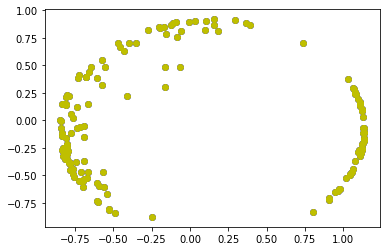

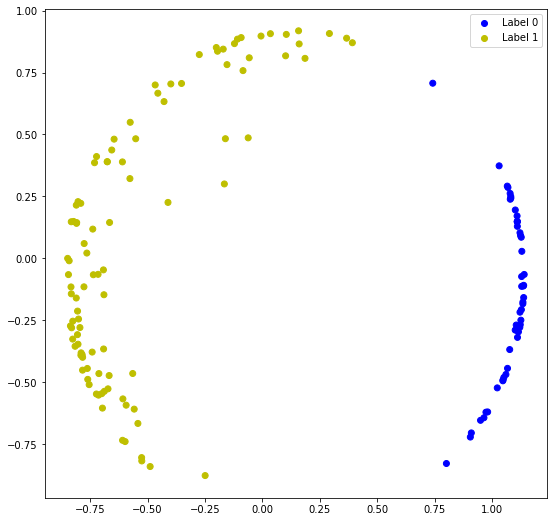

In [23]:
# Renk eşleme için etiket oluşturma
colours = {}
colours[0] = 'b'
colours[1] = 'y'
  
# Her veri noktası için renk vektörünün oluşturulması
cvec = [colours[label] for label in labels_rbf]
  
# Kümeleme dağılım grafiğini çizme  
b = plt.scatter(X_principal['P1'], X_principal['P2'], color ='b');
y = plt.scatter(X_principal['P1'], X_principal['P2'], color ='y');
  
plt.figure(figsize =(9, 9))
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec)
plt.legend((b, y), ('Label 0', 'Label 1'))
plt.show()

In [26]:

# Building the clustering model
spectral_model_nn = SpectralClustering(n_clusters = 2, affinity ='nearest_neighbors')
  
# Training the model and Storing the predicted cluster labels
labels_nn = spectral_model_nn.fit_predict(X_principal)

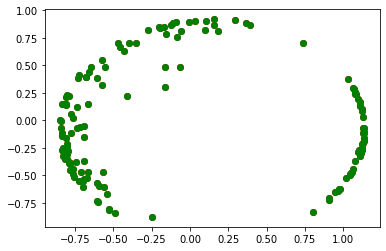

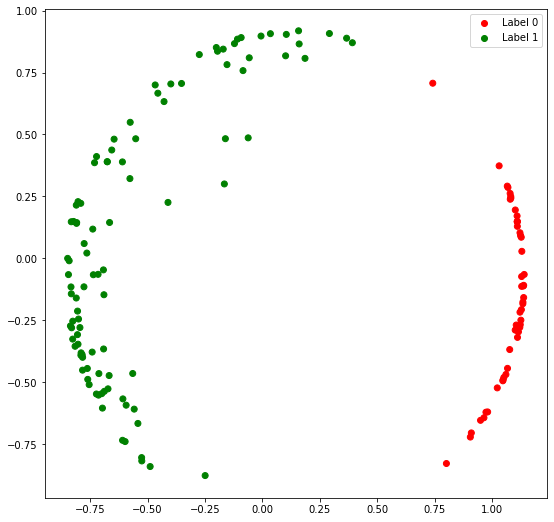

In [27]:

# Building the label to colour mapping
colours = {}
colours[0] = 'r'
colours[1] = 'g'
  
# Building the colour vector for each data point
cvec = [colours[label] for label in labels_nn]
  
# Plotting the clustered scatter plot
  
b = plt.scatter(X_principal['P1'], X_principal['P2'], color ='r');
y = plt.scatter(X_principal['P1'], X_principal['P2'], color ='g');
  
plt.figure(figsize =(9, 9))
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec)
plt.legend((b, y), ('Label 0', 'Label 1'))
plt.show()

#Performansların değerlendirilmesi

In [31]:
# Farklı yakınlık değerlerinin listesi
affinity = ['rbf', 'nearest-neighbours']
  
#Silhouette Scores Listesi
s_scores = []
  
# Performansı değerlendirme
s_scores.append(silhouette_score(X, labels_rbf))
s_scores.append(silhouette_score(X, labels_nn))
  
print(s_scores)

[0.6863930543445408, 0.6863930543445408]


#Performansların karşılaştırılması

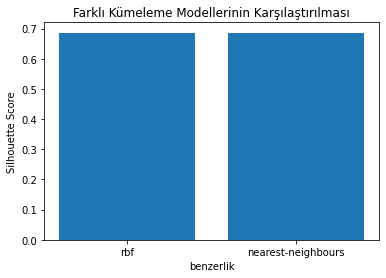

In [33]:
# Modelleri karşılaştırmak için bir Çubuk Grafik çizme
plt.bar(affinity, s_scores)
plt.xlabel('benzerlik')
plt.ylabel('Silhouette Score')
plt.title('Farklı Kümeleme Modellerinin Karşılaştırılması')
plt.show()